In [82]:
import requests
from bs4 import BeautifulSoup#not beautifulsoup, so stupid
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch


In [17]:
player_url = "https://understat.com/player/"
player = str(input("Please enter the player_id: "))
url = player_url+player


Please enter the player_id:  7008


In [75]:
url

'https://understat.com/player/7008'

In [76]:
res = requests.get(url)

soup = BeautifulSoup(res.content,'html.parser')

scripts = soup.find_all('script')

In [77]:
groups = scripts[1].string
minmaxplayerstats = scripts[2].string
shots = scripts[3].string
matches = scripts[4].string

In [78]:
ind_start = shots.index("('")+2
ind_end = shots.index("')")

json_data = shots[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [79]:
data #JSON

[{'id': '258765',
  'minute': '82',
  'result': 'Goal',
  'X': '0.885',
  'Y': '0.6880000305175781',
  'xG': '0.051118601113557816',
  'player': 'Vinícius Júnior',
  'h_a': 'h',
  'player_id': '7008',
  'situation': 'OpenPlay',
  'season': '2018',
  'shotType': 'RightFoot',
  'match_id': '10065',
  'h_team': 'Real Madrid',
  'a_team': 'Real Valladolid',
  'h_goals': '2',
  'a_goals': '0',
  'date': '2018-11-03 15:15:00',
  'player_assisted': 'Isco',
  'lastAction': 'Pass'},
 {'id': '259285',
  'minute': '89',
  'result': 'MissedShots',
  'X': '0.7930000305175782',
  'Y': '0.674000015258789',
  'xG': '0.02699729986488819',
  'player': 'Vinícius Júnior',
  'h_a': 'a',
  'player_id': '7008',
  'situation': 'OpenPlay',
  'season': '2018',
  'shotType': 'RightFoot',
  'match_id': '10084',
  'h_team': 'Eibar',
  'a_team': 'Real Madrid',
  'h_goals': '3',
  'a_goals': '0',
  'date': '2018-11-24 12:00:00',
  'player_assisted': 'Marcelo',
  'lastAction': 'BallRecovery'},
 {'id': '260090',
  'mi

In [100]:
df = pd.DataFrame(data) #dataframe

In [101]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,258765,82,Goal,0.885,0.6880000305175781,0.051118601113557816,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10065,Real Madrid,Real Valladolid,2,0,2018-11-03 15:15:00,Isco,Pass
1,259285,89,MissedShots,0.7930000305175782,0.674000015258789,0.02699729986488819,Vinícius Júnior,a,7008,OpenPlay,2018,RightFoot,10084,Eibar,Real Madrid,3,0,2018-11-24 12:00:00,Marcelo,BallRecovery
2,260090,86,BlockedShot,0.924000015258789,0.27600000381469725,0.052585601806640625,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10116,Real Madrid,Rayo Vallecano,1,0,2018-12-15 17:30:00,Lucas Vázquez,Pass
3,279985,14,SavedShot,0.8930000305175781,0.6630000305175782,0.22689999639987946,Vinícius Júnior,h,7008,OpenPlay,2018,LeftFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,Karim Benzema,Pass
4,279997,46,SavedShot,0.9619999694824218,0.37099998474121093,0.08477749675512314,Vinícius Júnior,h,7008,FromCorner,2018,RightFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,None,Rebound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,597400,38,MissedShots,0.9180000305175782,0.49599998474121093,0.45355862379074097,Vinícius Júnior,a,7008,OpenPlay,2024,Head,27075,Celta Vigo,Real Madrid,1,2,2024-10-19 19:00:00,None,None
382,597402,40,MissedShots,0.9309999847412109,0.6680000305175782,0.08906752616167068,Vinícius Júnior,a,7008,OpenPlay,2024,LeftFoot,27075,Celta Vigo,Real Madrid,1,2,2024-10-19 19:00:00,Federico Valverde,TakeOn
383,597406,65,Goal,0.925,0.3659999847412109,0.3638724088668823,Vinícius Júnior,a,7008,OpenPlay,2024,RightFoot,27075,Celta Vigo,Real Madrid,1,2,2024-10-19 19:00:00,Luka Modric,Throughball
384,598703,21,MissedShots,0.9080000305175782,0.63,0.30438435077667236,Vinícius Júnior,h,7008,OpenPlay,2024,RightFoot,27085,Real Madrid,Barcelona,0,4,2024-10-26 19:00:00,Aurelien Tchouameni,TakeOn


In [102]:
df['id'] = pd.to_numeric(df['id'], errors='coerce')
df['minute'] = pd.to_numeric(df['minute'], errors='coerce')
df['result'] = df['result'].astype(str)
#problem with X and Y
df['xG'] = pd.to_numeric(df['xG'], errors='coerce')
df['player'] = df['player'].astype(str)
df['h_a'] = df['h_a'].astype(str)
df['player_id'] = pd.to_numeric(df['player_id'], errors='coerce')
df['situation'] = df['situation'].astype(str)
df['season'] = pd.to_numeric(df['season'], errors='coerce')
df['shotType'] = df['shotType'].astype(str)
df['match_id'] = pd.to_numeric(df['match_id'], errors='coerce')
df['h_team'] = df['h_team'].astype(str)
df['a_team'] = df['a_team'].astype(str)
df['h_goals'] = pd.to_numeric(df['h_goals'], errors='coerce')
df['a_goals'] = pd.to_numeric(df['a_goals'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['player_assisted'] = df['player_assisted'].astype(str)
df['lastAction'] = df['lastAction'].astype(str)

In [103]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,258765,82,Goal,0.885,0.6880000305175781,0.051119,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10065,Real Madrid,Real Valladolid,2,0,2018-11-03 15:15:00,Isco,Pass
1,259285,89,MissedShots,0.7930000305175782,0.674000015258789,0.026997,Vinícius Júnior,a,7008,OpenPlay,2018,RightFoot,10084,Eibar,Real Madrid,3,0,2018-11-24 12:00:00,Marcelo,BallRecovery
2,260090,86,BlockedShot,0.924000015258789,0.27600000381469725,0.052586,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10116,Real Madrid,Rayo Vallecano,1,0,2018-12-15 17:30:00,Lucas Vázquez,Pass
3,279985,14,SavedShot,0.8930000305175781,0.6630000305175782,0.226900,Vinícius Júnior,h,7008,OpenPlay,2018,LeftFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,Karim Benzema,Pass
4,279997,46,SavedShot,0.9619999694824218,0.37099998474121093,0.084777,Vinícius Júnior,h,7008,FromCorner,2018,RightFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,None,Rebound


In [104]:
# Remove any extra spaces or non-numeric characters before conversion
df['X'] = df['X'].str.strip()
df['Y'] = df['Y'].str.strip()

# Convert to numeric
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Verify if there are still NaNs
print(df[['X', 'Y']].head())
print(df.dtypes)


       X      Y
0  0.885  0.688
1  0.793  0.674
2  0.924  0.276
3  0.893  0.663
4  0.962  0.371
id                          int64
minute                      int64
result                     object
X                         float64
Y                         float64
xG                        float64
player                     object
h_a                        object
player_id                   int64
situation                  object
season                      int64
shotType                   object
match_id                    int64
h_team                     object
a_team                     object
h_goals                     int64
a_goals                     int64
date               datetime64[ns]
player_assisted            object
lastAction                 object
dtype: object


In [70]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,258765,82,Goal,0.885,0.688,0.051119,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10065,Real Madrid,Real Valladolid,2,0,2018-11-03 15:15:00,Isco,Pass
1,259285,89,MissedShots,0.793,0.674,0.026997,Vinícius Júnior,a,7008,OpenPlay,2018,RightFoot,10084,Eibar,Real Madrid,3,0,2018-11-24 12:00:00,Marcelo,BallRecovery
2,260090,86,BlockedShot,0.924,0.276,0.052586,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10116,Real Madrid,Rayo Vallecano,1,0,2018-12-15 17:30:00,Lucas Vázquez,Pass
3,279985,14,SavedShot,0.893,0.663,0.226900,Vinícius Júnior,h,7008,OpenPlay,2018,LeftFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,Karim Benzema,Pass
4,279997,46,SavedShot,0.962,0.371,0.084777,Vinícius Júnior,h,7008,FromCorner,2018,RightFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,None,Rebound


In [105]:
df['X']=df['X']*100
df['Y']=df['Y']*100

In [106]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,258765,82,Goal,88.500000,68.800003,0.051119,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10065,Real Madrid,Real Valladolid,2,0,2018-11-03 15:15:00,Isco,Pass
1,259285,89,MissedShots,79.300003,67.400002,0.026997,Vinícius Júnior,a,7008,OpenPlay,2018,RightFoot,10084,Eibar,Real Madrid,3,0,2018-11-24 12:00:00,Marcelo,BallRecovery
2,260090,86,BlockedShot,92.400002,27.600000,0.052586,Vinícius Júnior,h,7008,OpenPlay,2018,RightFoot,10116,Real Madrid,Rayo Vallecano,1,0,2018-12-15 17:30:00,Lucas Vázquez,Pass
3,279985,14,SavedShot,89.300003,66.300003,0.226900,Vinícius Júnior,h,7008,OpenPlay,2018,LeftFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,Karim Benzema,Pass
4,279997,46,SavedShot,96.199997,37.099998,0.084777,Vinícius Júnior,h,7008,FromCorner,2018,RightFoot,10133,Real Madrid,Real Sociedad,0,2,2019-01-06 17:30:00,None,Rebound


In [120]:
filtered_df = df[(df['season'] == 2023) | (df['season'] == 2024)]


In [107]:
total_shots = filtered_df.shape[0] 
total_goals = filtered_df[filtered_df['result']=='Goal'].shape[0]
total_xG = filtered_df['xG'].sum()
xG_per_shot = total_xG/total_shots
points_average_distance = filteredf['X'].mean()
actual_average_distance = 120-(df['X']*1.2).mean()

In [90]:
actual_average_distance

np.float64(15.058445848455094)

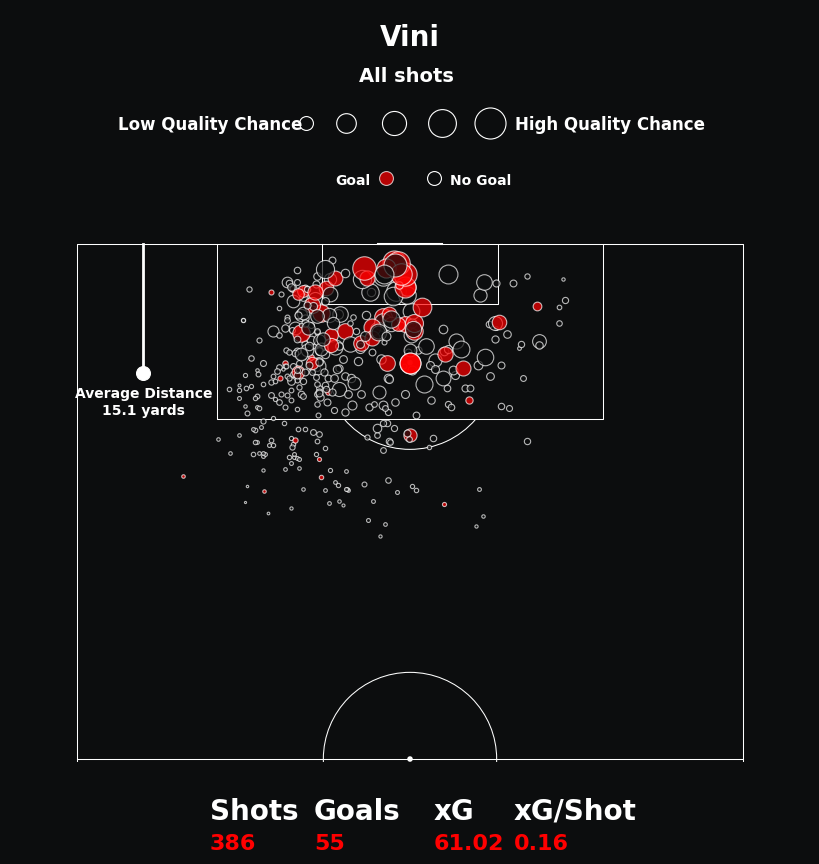

In [117]:
# Color -> They went with a black so we'll do the same. Notice how it isn't a pure black but rather a lighter little bit of grey black
background_color='#0C0D0E'

# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
# import matplotlib.font_manager as font_manager
# font_path = '/Users/mckayjohns/Documents/GitHub/youtube-videos/fonts/Arvo/Arvo-Regular.ttf'
# # Create a font properties object with the font file
# font_props = font_manager.FontProperties(fname=font_path)

pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5, 
    y=.85, 
    s='Vini', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'All shots ', 
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props, 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.25, 
    y=0.5, 
    s=f'Low Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'High Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)


ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='red' if x['result'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
    
ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.25, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
 

   ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Shot', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.set_axis_off()

# Save the figure
fig.savefig('vini.png', facecolor=background_color, bbox_inches='tight')



In [118]:
print(df['season'].unique().tolist())

[2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [119]:
filtered_df = df[(df['season'] == 2023) | (df['season'] == 2024)]
filtered_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
277,532313,34,SavedShot,90.000000,61.200001,0.391399,Vinícius Júnior,a,7008,OpenPlay,2023,RightFoot,22689,Athletic Club,Real Madrid,0,2,2023-08-12 19:30:00,David Alaba,TakeOn
278,532314,35,BlockedShot,89.599998,63.700001,0.093240,Vinícius Júnior,a,7008,OpenPlay,2023,RightFoot,22689,Athletic Club,Real Madrid,0,2,2023-08-12 19:30:00,None,Rebound
279,532322,69,SavedShot,89.300003,62.700001,0.119769,Vinícius Júnior,a,7008,OpenPlay,2023,RightFoot,22689,Athletic Club,Real Madrid,0,2,2023-08-12 19:30:00,Jude Bellingham,Pass
280,533471,7,MissedShots,71.699997,54.500000,0.017877,Vinícius Júnior,a,7008,OpenPlay,2023,RightFoot,22698,Almeria,Real Madrid,1,3,2023-08-19 17:30:00,Toni Kroos,Pass
281,533474,14,BlockedShot,96.199997,68.199997,0.072933,Vinícius Júnior,a,7008,OpenPlay,2023,LeftFoot,22698,Almeria,Real Madrid,1,3,2023-08-19 17:30:00,Jude Bellingham,TakeOn
